In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk
from misfit import MisfitFunction, DataMisfit, RegMisfit
from optimization import BBiter, CGiter
from core import ForwardSolver, getA, getP
from scipy.sparse import linalg
from scipy.ndimage import gaussian_filter
from scipy.io import loadmat

In [16]:
f = loadmat('/Users/izzatum/Desktop/FWI/data/marmousi_50.mat')
vel = f['vel']

# smooth velocity model
vel0 = gaussian_filter(vel, sigma=15)

In [17]:
# spatial axes
dx, dz = 50, 50
h = np.array([dz, dx])
n = np.array(vel.shape)

z = np.arange(0, n[0]*dz, dz)
x = np.arange(0, n[1]*dx, dx)

# frequencies
f = np.array([1.0, 2.0, 3.0])

# sources position
xs = np.arange(dx, n[1]*dx, 5 * dx)
zs = 4 * dx * np.ones_like(xs)

# receivers position
xr = np.arange(dx, n[1]*dx, 3 * dx)
zr = 2 * dx * np.ones_like(xr)

# sources matrix
q = np.eye(len(xs))


In [18]:
model = {
    'h': h,
    'f': f,
    'xr': xr,
    'zr': zr,
    'xs': xs,
    'zs': zs,
    'n': n,
    'z': z,
    'x': x,
    'q': q,
}

In [19]:
m, m0 = 1./(vel.reshape(-1, 1)) ** 2, 1./(vel0.reshape(-1, 1)) ** 2

# Ps = getP(h, xs, zs, x, z)

# Q = Ps.T @ q

# A1 = getA(f[0], m, h, n)

# U1 = linalg.spsolve(A1, Q)

# # plot model
# plt.figure(figsize=(20, 20))
# plt.subplot(221)
# plt.imshow(U1[:,22].real.reshape(n))
# plt.plot(xs[22] // h[0], zs[22] // h[1], 'r*')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Real U1', fontsize=15, fontweight='bold')
# plt.colorbar()
# plt.grid('on', which='both')
# plt.axis('tight')

# plt.subplot(222)
# plt.imshow(U1[:,22].imag.reshape(n))
# plt.plot(xs[22] // h[0], zs[22] // h[1], 'r*')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Imag U1', fontsize=15, fontweight='bold')
# plt.colorbar()
# plt.grid('on', which='both')
# plt.axis('tight')


In [20]:
Fm = ForwardSolver(model)
Dobs, Jo = Fm.solve(m)
dataMisfit = DataMisfit(Dobs, model)
regMisfit = RegMisfit(n, alpha=0.5, m0=m0)
misfitFn = MisfitFunction(dataMisfit, regMisfit)

/Users/izzatum/opt/anaconda3/lib/python3.8/site-packages/pylops/signalprocessing/Bilinear.py:122: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ncp_add_at(y, [self.iava_t, self.iava_l],
/Users/izzatum/opt/anaconda3/lib/python3.8/site-packages/pylops/signalprocessing/Bilinear.py:124: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ncp_add_at(y, [self.iava_t, self.iava_r],
/Users/izzatum/opt/anaconda3/lib/python3.8/site-packages/pylops/signalprocessing/Bilinear.py:126: FutureWarning: Using a non-tuple sequence for multidimensional indexing is

In [21]:
history, mk, gk = BBiter(misfitFn, m0, tol=1.e-3, maxit=20)
# history, mk, gk = CGiter(misfitFn, m0, Dobs, Fm, tol=1.e-6, maxit=10)

Optimization starts!
k: 1  fk: 791382784.71  ||gk||: 1029973038.69
k: 2  fk: 832237511.38  ||gk||: 831674930.37
k: 3  fk: 606700213.14  ||gk||: 114908608.40
k: 4  fk: 595211421.84  ||gk||: 98159787.31
k: 5  fk: 554404433.64  ||gk||: 78361781.91
k: 6  fk: 537713971.71  ||gk||: 102970913.07
k: 7  fk: 536288055.86  ||gk||: 146753219.98
k: 8  fk: 498208483.51  ||gk||: 49045557.58
k: 9  fk: 489315532.16  ||gk||: 36841069.27
k: 10  fk: 473623721.04  ||gk||: 35487483.68


/Users/izzatum/Desktop/FWI/core.py:52: RuntimeWarning: invalid value encountered in sqrt
  (2.0j * omega / h[0]) * sparse.spdiags((1.0 - a) * np.sqrt(m), 0, N, N, format='csc') + L
/Users/izzatum/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:206: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
/Users/izzatum/Desktop/FWI/core.py:122: RuntimeWarning: invalid value encountered in sqrt
  return omega ** 2 * (a * u) + (2.0j * omega / h[0]) * (0.5 * (1.0 - a) * u / np.sqrt(m))


k: 11  fk: nan  ||gk||: nan
k: 12  fk: nan  ||gk||: nan
k: 13  fk: nan  ||gk||: nan
k: 14  fk: nan  ||gk||: nan
k: 15  fk: nan  ||gk||: nan
k: 16  fk: nan  ||gk||: nan
k: 17  fk: nan  ||gk||: nan
k: 18  fk: nan  ||gk||: nan
k: 19  fk: nan  ||gk||: nan
k: 20  fk: nan  ||gk||: nan
Optimization ended!


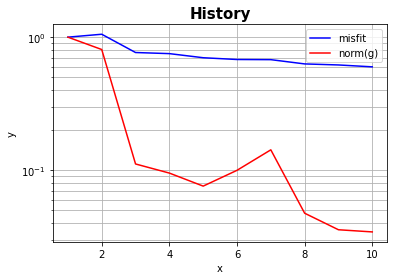

In [22]:
plt.figure()
plt.semilogy(history[:, 0], history[:, 1] / history[0, 1], "b-", label='misfit')
plt.semilogy(history[:, 0], history[:, 2] / history[0, 2], "r-", label='norm(g)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('History', fontsize=15, fontweight='bold')
plt.legend()
plt.grid('on', which='both')
plt.axis('tight')
plt.show()

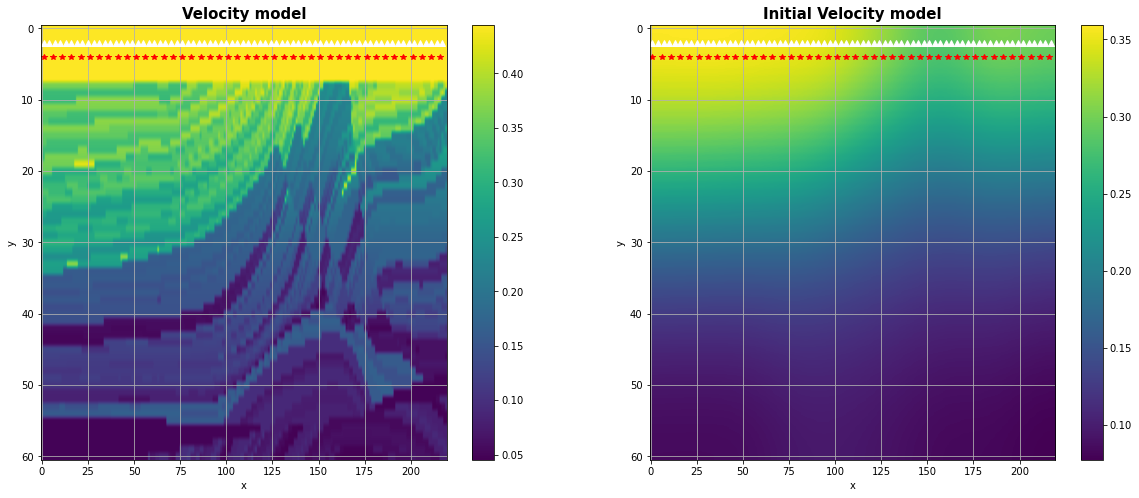

In [23]:
# plot model
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.imshow(m.reshape(n))
plt.plot(xr // h[0], zr // h[1], 'w^')
plt.plot(xs // h[0], zs // h[1], 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity model', fontsize=15, fontweight='bold')
plt.colorbar()
plt.grid('on', which='both')
plt.axis('tight')

plt.subplot(122)
plt.imshow(m0.reshape(n))
plt.plot(xr // h[0], zr // h[1], 'w^')
plt.plot(xs // h[0], zs // h[1], 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial Velocity model', fontsize=15, fontweight='bold')
plt.colorbar()
plt.grid('on', which='both')
plt.axis('tight')

plt.show()


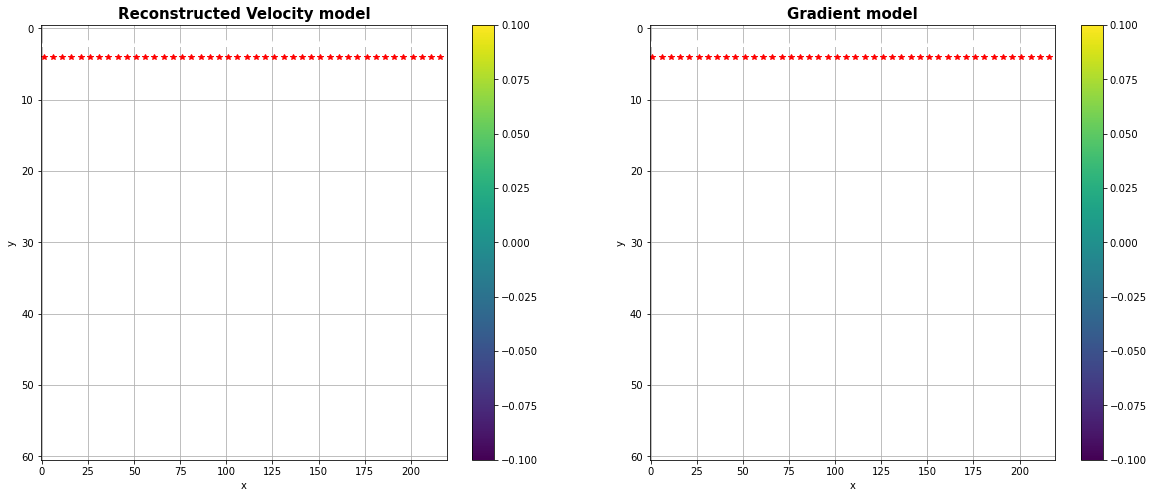

In [24]:
# plot model
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.imshow(1./np.sqrt(mk).reshape(n))
plt.plot(xr // h[0], zr // h[1], 'w^')
plt.plot(xs // h[0], zs // h[1], 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Reconstructed Velocity model', fontsize=15, fontweight='bold')
plt.colorbar()
plt.grid('on', which='both')
plt.axis('tight')

plt.subplot(122)
plt.imshow(gk.reshape(n))
plt.plot(xr // h[0], zr // h[1], 'w^')
plt.plot(xs // h[0], zs // h[1], 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient model', fontsize=15, fontweight='bold')
plt.colorbar()
plt.grid('on', which='both')
plt.axis('tight')

plt.show()